<a href="https://colab.research.google.com/github/UrielMendoza/Curso-RV-python/blob/master/Viernes_resuelto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# Cartopy

Cartopy es un paquete de Python diseñado para el procesamiento de datos geoespaciales con el fin de producir mapas y otros análisis de datos geoespaciales.

Instalación 

In [2]:
!apt install python3-cartopy

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  python3-pkg-resources python3-pyshp python3-shapely python3-six
Suggested packages:
  python3-matplotlib python3-owslib python3-pil python3-pyepsg python3-scipy
  python3-setuptools python-shapely-doc
The following NEW packages will be installed:
  python3-cartopy python3-pkg-resources python3-pyshp python3-shapely
  python3-six
0 upgraded, 5 newly installed, 0 to remove and 7 not upgraded.
Need to get 5,570 kB of archives.
After this operation, 10.4 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 python3-pkg-resources all 39.0.1-2 [98.8 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 python3-pyshp all 1.2.12+ds-1 [31.5 kB]
Get:3 http://a

**Proyecciones**


PlateCarree (Equirrectangular)

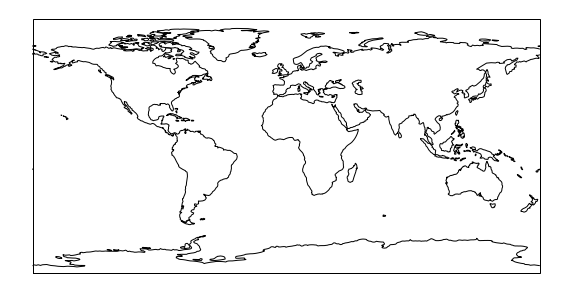

In [4]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

Mercator

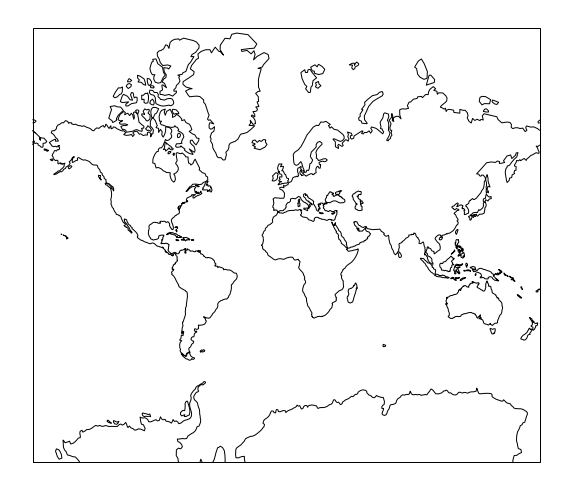

In [6]:
plt.figure(figsize=(10,10))
ax = plt.axes(projection=ccrs.Mercator())
ax.coastlines()

Robinson

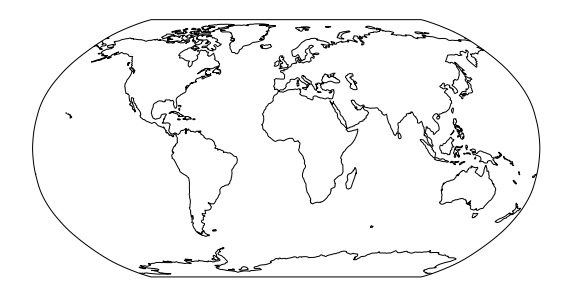

In [7]:
plt.figure(figsize=(10,10))
ax = plt.axes(projection=ccrs.Robinson())
ax.coastlines()

UTM

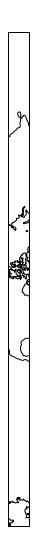

In [8]:
plt.figure(figsize=(10,10))
ax = plt.axes(projection=ccrs.UTM(zone=14))
ax.coastlines()

CCL

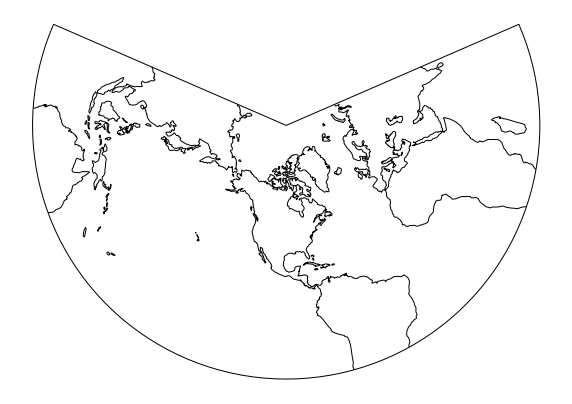

In [9]:
plt.figure(figsize=(10,10))
ax = plt.axes(projection=ccrs.LambertConformal())
ax.coastlines()

Geoestacionario

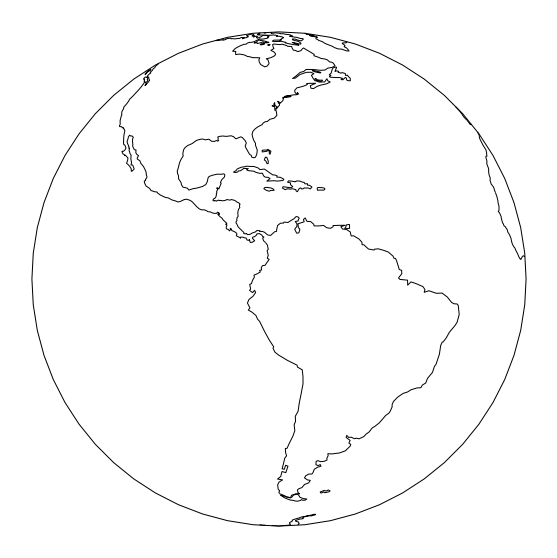

In [12]:
plt.figure(figsize=(10,10))
ax = plt.axes(projection=ccrs.Geostationary(central_longitude=-75.2))
ax.coastlines()

Graficacion 

/usr/lib/python3/dist-packages/cartopy/io/__init__.py:264: DownloadWarning: Downloading: http://naciscdn.org/naturalearth/50m/physical/ne_50m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


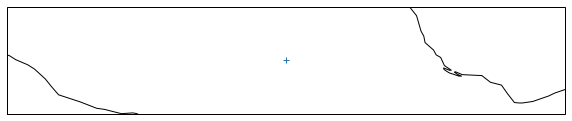

In [13]:
plt.figure(figsize=(10,10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(resolution='50m')
ax.plot(-99,19,'+')

Extención

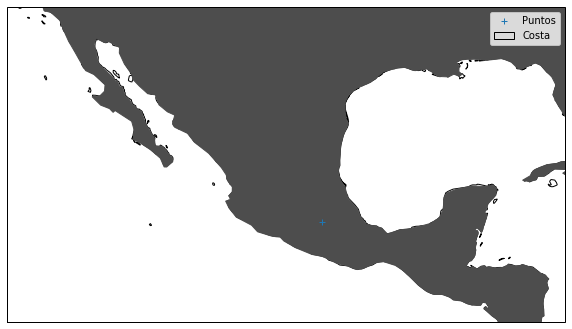

In [22]:
import cartopy.feature as cfeature

plt.figure(figsize=(10,10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(resolution='50m')
ax.set_extent([-121,-82, 12, 34], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND, facecolor='0.3')
ax.plot(-99,19,'+')
ax.legend(['Puntos','Costa'])

Geopandas y Cartopy

In [23]:
!pip install geopandas

     |████████████████████████████████| 921kB 8.2MB/s 
     |████████████████████████████████| 11.8MB 29.0MB/s 
     |████████████████████████████████| 10.1MB 29.1MB/s 


Apertura y reproyeccion

In [24]:
import geopandas as gpd

agua = gpd.read_file('/content/drive/My Drive/Curso-RV-python/EMCA_DBO_2018/EMCA_DBO5_2018.shp')
agua = agua.to_crs({'init':'epsg:3857'})
rios = gpd.read_file('/content/drive/My Drive/Curso-RV-python/hidro4mgw_c/hidro4mcw.shp')
rios = rios.to_crs({'init':'epsg:3857'})

/usr/local/lib/python3.6/dist-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))
/usr/local/lib/python3.6/dist-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


In [25]:
agua.crs
rios.crs

{'init': 'epsg:3857'}

In [30]:
agua.head()
rios.head()

,FNODE_,TNODE_,LPOLY_,RPOLY_,LENGTH,COV_,COV_ID,NOMBRES,geometry
0,0,0,0,0,6117.571854,1,1,None,"LINESTRING (-11860346.708 3734696.623, -118553..."
1,0,0,0,0,3985.434478,2,2,None,"LINESTRING (-11855305.037 3729598.594, -118516..."
2,0,0,0,0,3195.140889,3,3,None,"LINESTRING (-11851696.159 3732559.988, -118479..."
3,0,0,0,0,5645.737197,4,4,None,"LINESTRING (-11847966.325 3732349.761, -118430..."
4,0,0,0,0,26475.678766,5,5,R. Bravo o Grande del Norte,"LINESTRING (-11843093.218 3727877.023, -118288..."


Graficacion conjunta

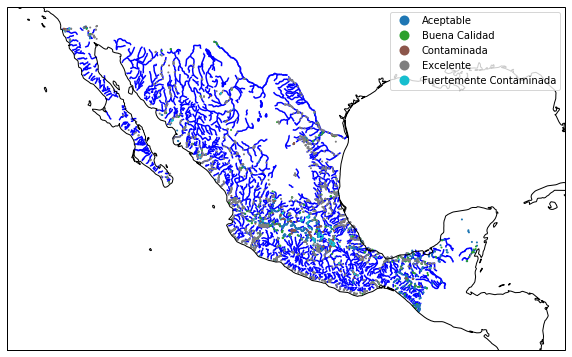

In [37]:
plt.figure(figsize=(10,10))
ax = plt.axes(projection=ccrs.Mercator())
ax.coastlines(resolution='50m')
ax.set_extent([-121,-82, 12, 34], crs=ccrs.PlateCarree())
agua.plot(ax=ax, markersize=1,zorder=1,column='dbo_clas',legend=True)
rios.plot(ax=ax, markersize=1,zorder=0,color='b',legend=True)


Extent

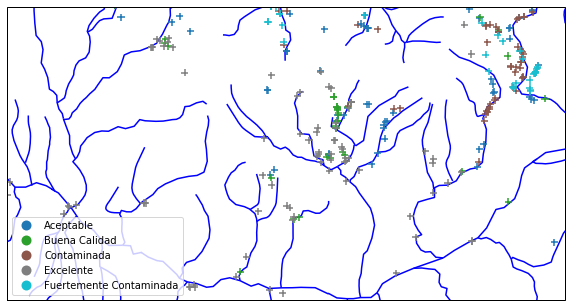

In [45]:
plt.figure(figsize=(10,10))
ax = plt.axes(projection=ccrs.Mercator())
ax.coastlines(resolution='50m')
ax.set_extent([-101,-98,18,19.5], crs=ccrs.PlateCarree())
agua.plot(ax=ax, marker= '+', markersize=50,zorder=1,column='dbo_clas',legend=True)
rios.plot(ax=ax, markersize=1,zorder=0,color='b',legend=True)

Municipios

In [49]:
muni = gpd.read_file('/content/drive/My Drive/Curso-RV-python/muni_2018gw/muni_2018gw.shp')
muni = muni.to_crs({'init':'epsg:3857'})

/usr/local/lib/python3.6/dist-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


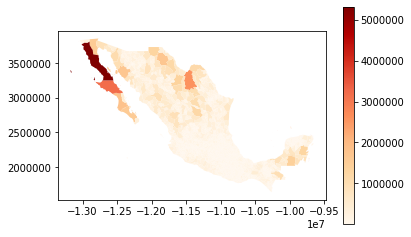

In [73]:
muni.plot(column='AREA', cmap='OrRd',legend=True)

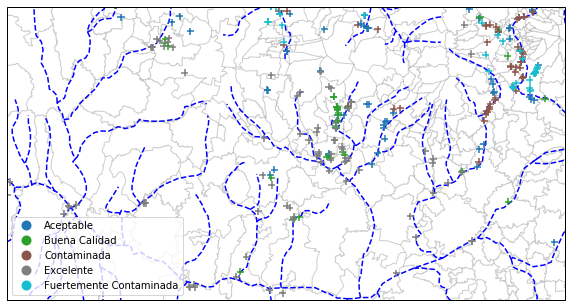

In [81]:
plt.figure(figsize=(10,10))
ax = plt.axes(projection=ccrs.Mercator())
ax.coastlines(resolution='50m')
ax.set_extent([-101,-98,18,19.5], crs=ccrs.PlateCarree())
agua.plot(ax=ax, marker= '+', markersize=50,zorder=2,column='dbo_clas',legend=True)
rios.plot(ax=ax, linestyle='--',markersize=1,zorder=1,color='b',legend=True)
muni.plot(ax=ax,alpha=0.1,color='white',edgecolor='black',zorder=0)

**Geoprocesamiento**

Diferencia


```
from geopandas.tools import overlay
symDif= gpd.overlay(riosb,aguab, how='symetricalDifference)
```



In [0]:
from shapely import ops

riosb = rios.buffer(500)
aguab = agua.buffer(10000)
aguab = ops.unary_union(aguab)

dif = rios.difference(aguab)

In [100]:
aguab

Area

In [106]:
dif = gpd.GeoDataFrame(dif)
dif = dif.rename(columns={0:'geometry'}).set_geometry('geometry')
dif['perimetro'] = dif.length
dif

,geometry,area,perimetro
0,GEOMETRYCOLLECTION EMPTY,0.000000,0.000000
1,GEOMETRYCOLLECTION EMPTY,0.000000,0.000000
2,GEOMETRYCOLLECTION EMPTY,0.000000,0.000000
3,GEOMETRYCOLLECTION EMPTY,0.000000,0.000000
4,GEOMETRYCOLLECTION EMPTY,0.000000,0.000000
...,...,...,...
2229,"LINESTRING (-12335367.713 2743266.272, -123325...",27064.131849,27064.131849
2230,"LINESTRING (-12318451.317 2723174.935, -123178...",35598.041655,35598.041655
2231,"LINESTRING (-12240016.458 2681638.138, -122400...",25.274831,25.274831
2232,"LINESTRING (-12240041.731 2681638.419, -122439...",3890.008699,3890.008699


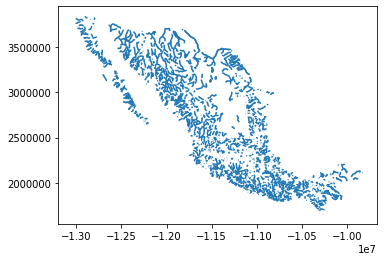

In [107]:
symDif.plot()

Graficacion

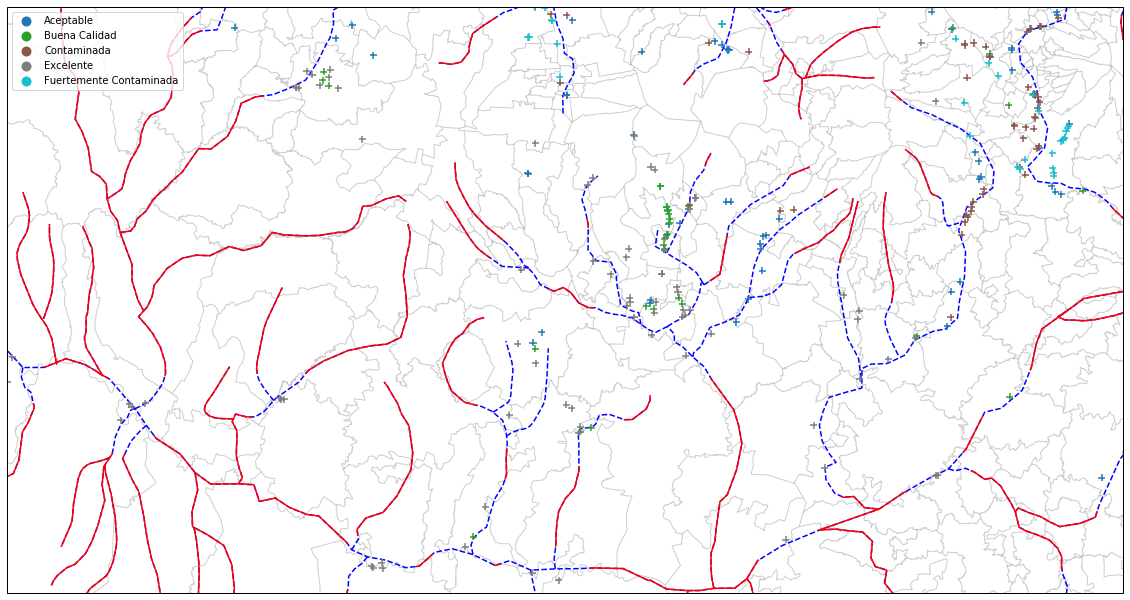

In [108]:
plt.figure(figsize=(20,20))
ax = plt.axes(projection=ccrs.Mercator())
ax.coastlines(resolution='50m')
ax.set_extent([-101,-98,18,19.5], crs=ccrs.PlateCarree())
agua.plot(ax=ax, marker= '+', markersize=50,zorder=2,column='dbo_clas',legend=True)
rios.plot(ax=ax, linestyle='--',markersize=0.5,zorder=1,color='b',legend=True)
muni.plot(ax=ax,alpha=0.1,color='white',edgecolor='black',zorder=0)
dif.plot(ax=ax,color = 'red',legend = True)

In [0]:
dif

geopandas.geoseries.GeoSeries

Escritura de archivo

In [0]:
symDif = gpd.GeoDataFrame(symDif)
symDif = symDif.rename(columns={0:'geometry'}).set_geometry('geometry')
symDif.to_file('monitoreo.shp',driver='ESRI Shapefile')